# Analyze and compare all LLMs
---

This notebook loads all Pulse LLMs and compares the best versions of them. 

In [1]:
import pandas as pd
import numpy as np
import os
import sys
import json
import matplotlib.pyplot as plt
sys.path.append(r"C:\Users\janbe\Documents\GitHub Repos\pulse")
from src.eval.llm_analyzer import LLMAnalyzer

In [ ]:
# Path to LLM output folder
outputfolder_path_list = [
    r"C:\Users\janbe\Documents\GitHub Repos\pulse\output_to_keep\results_benchmark\results_output\jsons",
    r"C:\Users\janbe\Documents\GitHub Repos\pulse\output_to_keep\results_benchmark\results_output\llms",
]

In [3]:
# model_list = []
# #list all models in the output folder
# for output_folder in outputfolder_path_list:
#     # List all child folders (directories) in the output folder
#     child_folders = [
#         name for name in os.listdir(output_folder)
#         if os.path.isdir(os.path.join(output_folder, name))
#     ]
#     model_list.extend(child_folders)

In [4]:
model_list = os.listdir(outputfolder_path_list[0])
model_list

['deepseekr1llama8b_results.json',
 'gemini2p5flash_results.json',
 'gemma3_results.json',
 'gpt4o_results.json',
 'llama3p18b_results.json',
 'medgemma_results.json',
 'mistral7b_results.json',
 'o3_results.json']

In [5]:
best_approach = LLMAnalyzer.find_best_prompting_id(
    outputfolder_path_list[0], model_list, metric="task_dataset_score"
)
best_approach

,deepseekr1llama8b_results.json,gemini2p5flash_results.json,gemma3_results.json,gpt4o_results.json,llama3p18b_results.json,medgemma_results.json,mistral7b_results.json,o3_results.json
prompting_id,liu_2023_few_shot_preprocessor,clinical_workflow_agent_preprocessor,hybrid_agent_incomplete,sarvari_2024_aggregation_preprocessor,collaborative_reasoning_agent_preprocessor,liu_2023_few_shot_preprocessor,collaborative_reasoning_agent_preprocessor,hybrid_reasoning_agent_preprocessor_incomplete
metric_value,41.657963,50.086568,41.502296,49.895222,47.664542,33.570222,33.093667,54.949357
metrics_report_path,C:\Users\janbe\Documents\GitHub Repos\pulse\ou...,C:\Users\janbe\Documents\GitHub Repos\pulse\ou...,C:\Users\janbe\Documents\GitHub Repos\pulse\ou...,C:\Users\janbe\Documents\GitHub Repos\pulse\ou...,C:\Users\janbe\Documents\GitHub Repos\pulse\ou...,C:\Users\janbe\Documents\GitHub Repos\pulse\ou...,C:\Users\janbe\Documents\GitHub Repos\pulse\ou...,C:\Users\janbe\Documents\GitHub Repos\pulse\ou...


In [41]:
df_all_metrics = pd.DataFrame()
for model in best_approach.columns:
    if best_approach[model] is not None:
        metrics_report_path = best_approach[model]["metrics_report_path"]
        prompting_id = best_approach[model]["prompting_id"]
        print(f"Model: {model}, Prompting ID: {prompting_id}")
        
        # Load the metrics report
        df_temp = LLMAnalyzer.load_metrics_report_as_df(metrics_report_path)
        df_all_metrics = pd.concat([df_all_metrics, df_temp])
    else:
        print(f"No valid report found for model: {model}")
df_all_metrics

Model: deepseekr1llama8b_results.json, Prompting ID: liu_2023_few_shot_preprocessor
Model: gemini2p5flash_results.json, Prompting ID: clinical_workflow_agent_preprocessor
Model: gemma3_results.json, Prompting ID: hybrid_agent_incomplete
Model: gpt4o_results.json, Prompting ID: sarvari_2024_aggregation_preprocessor
Model: llama3p18b_results.json, Prompting ID: collaborative_reasoning_agent_preprocessor
Model: medgemma_results.json, Prompting ID: liu_2023_few_shot_preprocessor
Model: mistral7b_results.json, Prompting ID: collaborative_reasoning_agent_preprocessor
Model: o3_results.json, Prompting ID: hybrid_reasoning_agent_preprocessor_incomplete


,results
0,"{'model_id': 'deepseekr1llama8b', 'task_id': '..."
1,"{'model_id': 'deepseekr1llama8b', 'task_id': '..."
2,"{'model_id': 'deepseekr1llama8b', 'task_id': '..."
3,"{'model_id': 'deepseekr1llama8b', 'task_id': '..."
4,"{'model_id': 'deepseekr1llama8b', 'task_id': '..."
...,...
9,"{'model_id': 'o3', 'task_id': 'mortality', 'da..."
10,"{'model_id': 'o3', 'task_id': 'mortality', 'da..."
11,"{'model_id': 'o3', 'task_id': 'sepsis', 'datas..."
12,"{'model_id': 'o3', 'task_id': 'sepsis', 'datas..."


In [47]:
results = df_all_metrics['results']

In [49]:
plot_dict = {"model":{},"dataset":{},"task":{},"task_dataset":{}}
for row in results:
    plot_dict["model"] = row["model_id"]
    plot_dict["model"] = row["model_id"]

deepseekr1llama8b
deepseekr1llama8b
deepseekr1llama8b
deepseekr1llama8b
deepseekr1llama8b
deepseekr1llama8b
deepseekr1llama8b
deepseekr1llama8b
deepseekr1llama8b
deepseekr1llama8b
deepseekr1llama8b
deepseekr1llama8b
deepseekr1llama8b
deepseekr1llama8b
deepseekr1llama8b
deepseekr1llama8b
deepseekr1llama8b
deepseekr1llama8b
deepseekr1llama8b
deepseekr1llama8b
deepseekr1llama8b
deepseekr1llama8b
deepseekr1llama8b
deepseekr1llama8b
deepseekr1llama8b
deepseekr1llama8b
deepseekr1llama8b
deepseekr1llama8b
deepseekr1llama8b
deepseekr1llama8b
deepseekr1llama8b
deepseekr1llama8b
deepseekr1llama8b
deepseekr1llama8b
deepseekr1llama8b
deepseekr1llama8b
deepseekr1llama8b
deepseekr1llama8b
deepseekr1llama8b
deepseekr1llama8b
deepseekr1llama8b
deepseekr1llama8b
deepseekr1llama8b
deepseekr1llama8b
deepseekr1llama8b
deepseekr1llama8b
deepseekr1llama8b
deepseekr1llama8b
deepseekr1llama8b
deepseekr1llama8b
deepseekr1llama8b
deepseekr1llama8b
deepseekr1llama8b
deepseekr1llama8b
gemini2p5flash
gemini2p5flas

In [12]:
LLMAnalyzer.plot_metrics(df_all_metrics, group=['model_id'], title_prefix='')

KeyError: 'model_id'

C:\Users\janbe\Documents\GitHub Repos\pulse\src\eval\llm_analyzer.py:719: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_df = plot_df.groupby(["Group", "Metric"], as_index=False).agg(


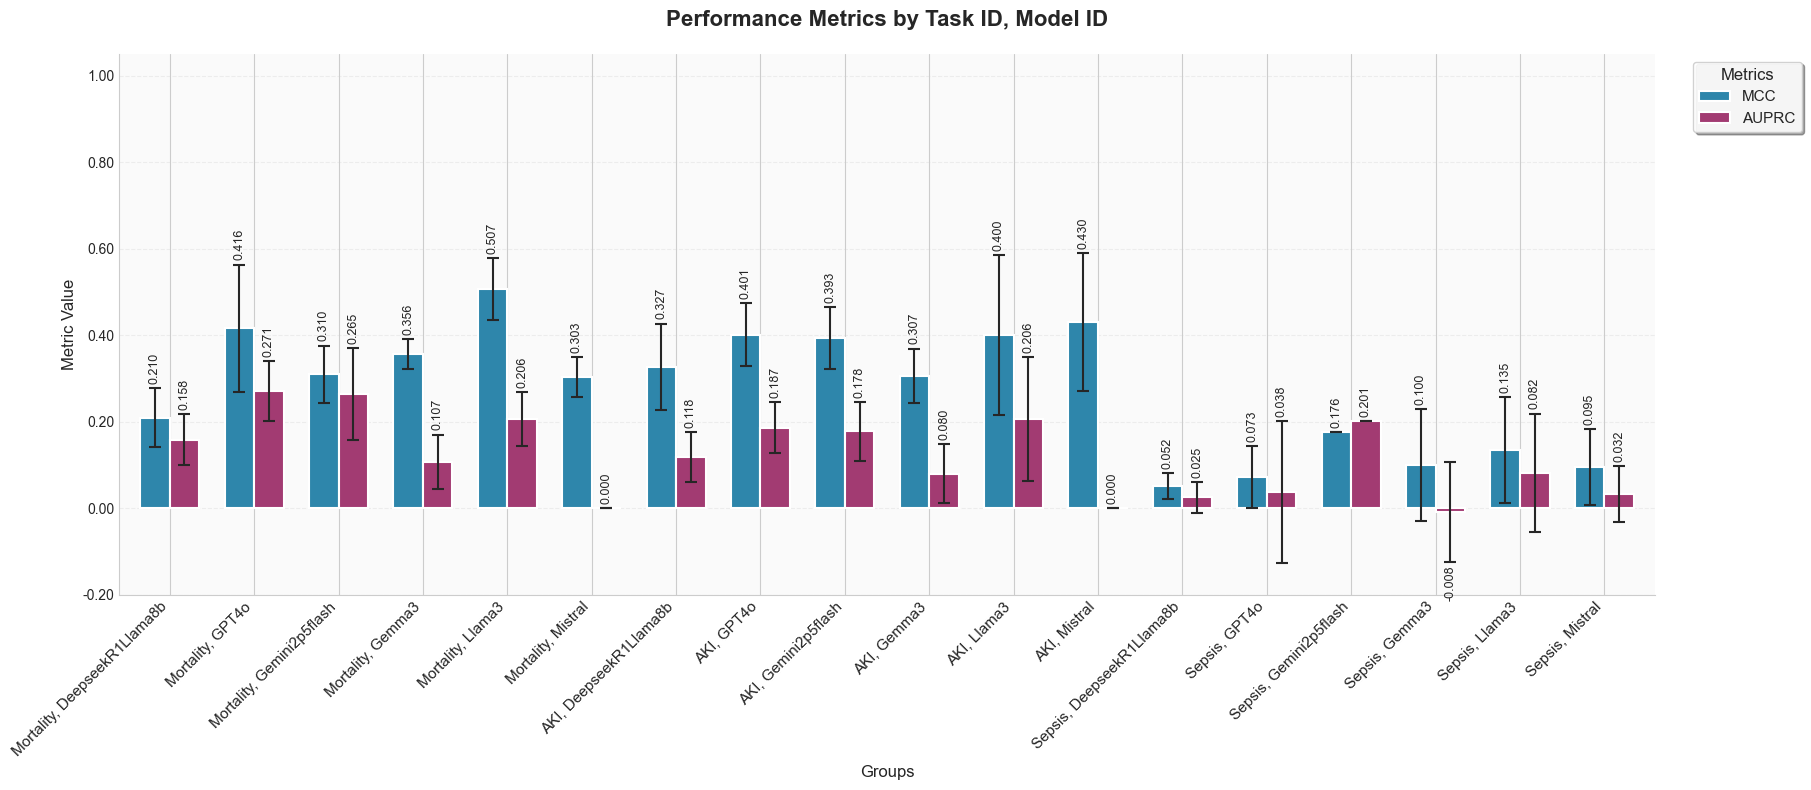

In [7]:
LLMAnalyzer.plot_metrics(
    df_all_metrics, group=["task_id", "model_id"], title_prefix="", metrics=["MCC", "AUPRC"]
)